In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import optbinning as opt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from scipy.stats import chi2_contingency
import warnings
from typing import List
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("../data/application_train_vf.csv",parse_dates=["date_mensuelle"], index_col=0)

In [3]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle
0,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,32364.0,1102500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.018209,-11763,-688,-500.0,-3325,9.0,1,1,0,1,1,0,Drivers,3.0,3,3,THURSDAY,9,0,0,0,0,0,0,Transport: type 3,NaN,0.616187,0.651260,0.2938,0.1995,0.9891,NaN,NaN,0.28,0.2414,0.3750,NaN,0.1346,NaN,0.0645,NaN,0.0028,0.2994,0.2070,0.9891,NaN,NaN,0.2820,0.2414,0.3750,NaN,0.1377,NaN,0.0672,NaN,0.0030,0.2967,0.1995,0.9891,NaN,NaN,0.28,0.2414,0.3750,NaN,0.1370,NaN,0.0656,NaN,0.0029,NaN,block of flats,0.2379,Panel,No,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2013-01-01
1,250254,0,Cash loans,F,N,Y,0,180000.0,270000.0,10179.0,270000.0,Unaccompanied,Working,Higher education,Married,With parents,0.003122,-12460,-2988,-1576.0,-454,NaN,1,1,0,1,1,0,High skill tech staff,2.0,3,3,THURSDAY,10,0,0,0,0,0,0,University,NaN,0.548623,0.413597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-17.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,5.0,2013-01-01
2,265071,0,Cash loans,F,Y,N,2,67500.0,80865.0,7546.5,67500.0,Children,Working,Secondary / secondary special,Married,House / apartment,0.018634,-11118,-907,-10654.0,-425,9.0,1,1,1,1,0,0,Laborers,4.0,2,2,MONDAY,10,0,0,0,0,0,0,Government,0.282297,0.582081,0.399676,0.1237,0.0493,0.9861,NaN,NaN,0.00,0.2759,0.1667,NaN,0.0678,NaN,0.1103,NaN,0.0000,0.1261,0.0511,0.9861,NaN,NaN,0.0000,0.2759,0.1667,NaN,0.0694,NaN,0.1149,NaN,0.0000,0.1249,0.0493,0.9861,NaN,NaN,0.00,0.2759,0.1667,NaN,0.0690,NaN,0.1123,NaN,0.0000,NaN,block of flats,0.1210,"Stone, brick",No,0.0,0.0,0.0,0.0,-358.0,0,1,0,0,0,0,0,0,0,0

In [4]:
data["SK_ID_CURR"].value_counts().max()

1

In [5]:
data["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276940
Revolving loans     29167
Name: count, dtype: int64

In [6]:
pd.DataFrame(data.isna().mean())

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.000039


In [7]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.923285
1    0.076715
Name: proportion, dtype: float64

#### Etudes des variables -- prédicteurs potentiels

In [8]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE  

In [9]:
pd.to_datetime(data["date_mensuelle"], format="%Y-%m-%d").dtypes

dtype('<M8[ns]')

In [10]:
data.nunique()

SK_ID_CURR                      306107
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2545
AMT_CREDIT                        5597
AMT_ANNUITY                      13667
AMT_GOODS_PRICE                   1000
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12571
DAYS_REGISTRATION                15687
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [11]:
drop_documents_cols=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4" , 
"FLAG_DOCUMENT_5" , "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7" ,              
"FLAG_DOCUMENT_8" , "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10"  ,"FLAG_DOCUMENT_11" , "FLAG_DOCUMENT_12",              
"FLAG_DOCUMENT_13" ,"FLAG_DOCUMENT_14" ,"FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16" ,
"FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]

In [12]:
data.drop(columns=drop_documents_cols, inplace=True)

In [13]:
def convert_numeric_to_category(df: pd.DataFrame):
    for colname in df.columns.tolist():
        if (df[colname].dtype=="number") & (df[colname].nunique() <=10):
            df[colname]=df[colname].astype("category")
            pass
        else:
            pass

In [14]:
convert_numeric_to_category(data)

In [15]:
data["date_annee"]=data["date_mensuelle"].dt.year

In [16]:
out_of_sample_data=data[data["date_annee"]==2020]
data=data[data["date_annee"]<2020]


In [17]:
out_of_sample_data["TARGET"].value_counts(normalize=True)


TARGET
0    0.920863
1    0.079137
Name: proportion, dtype: float64

In [18]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.923632
1    0.076368
Name: proportion, dtype: float64

In [19]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE  

In [20]:
categorical_vars=data.select_dtypes(include="object").columns.tolist()

In [35]:
categorical_vars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [21]:
numerical_vars=data.select_dtypes(include="number").columns.tolist()

In [34]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [22]:
binary_vars=[var for var in numerical_vars if (data[var].nunique()==2)&(var !="TARGET")]

In [25]:
binary_vars

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

## Variables catégorielles

In [38]:
for col in categorical_vars:
    print(f"Nombre de modalités de {col} : {data[col].nunique()}")

Nombre de modalités de NAME_CONTRACT_TYPE : 2
Nombre de modalités de CODE_GENDER : 3
Nombre de modalités de FLAG_OWN_CAR : 2
Nombre de modalités de FLAG_OWN_REALTY : 2
Nombre de modalités de NAME_TYPE_SUITE : 7
Nombre de modalités de NAME_INCOME_TYPE : 8
Nombre de modalités de NAME_EDUCATION_TYPE : 5
Nombre de modalités de NAME_FAMILY_STATUS : 6
Nombre de modalités de NAME_HOUSING_TYPE : 6
Nombre de modalités de OCCUPATION_TYPE : 18
Nombre de modalités de WEEKDAY_APPR_PROCESS_START : 7
Nombre de modalités de ORGANIZATION_TYPE : 58
Nombre de modalités de FONDKAPREMONT_MODE : 4
Nombre de modalités de HOUSETYPE_MODE : 3
Nombre de modalités de WALLSMATERIAL_MODE : 7
Nombre de modalités de EMERGENCYSTATE_MODE : 2


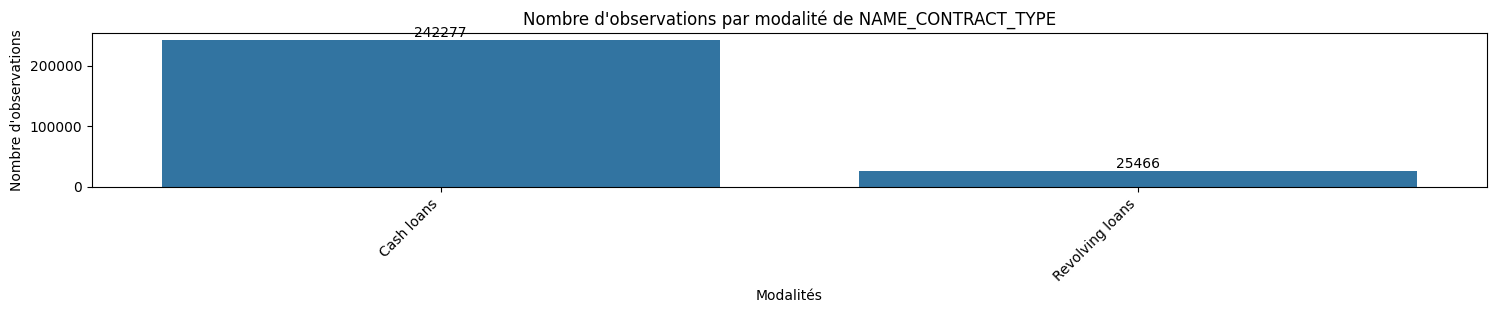

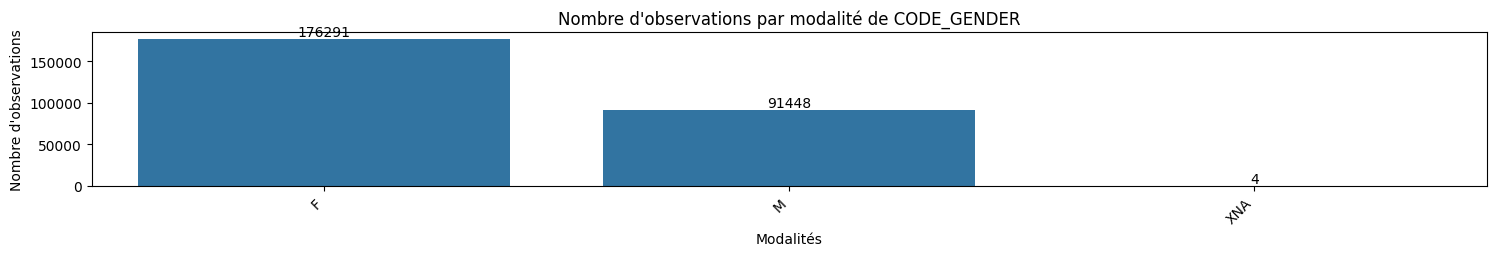

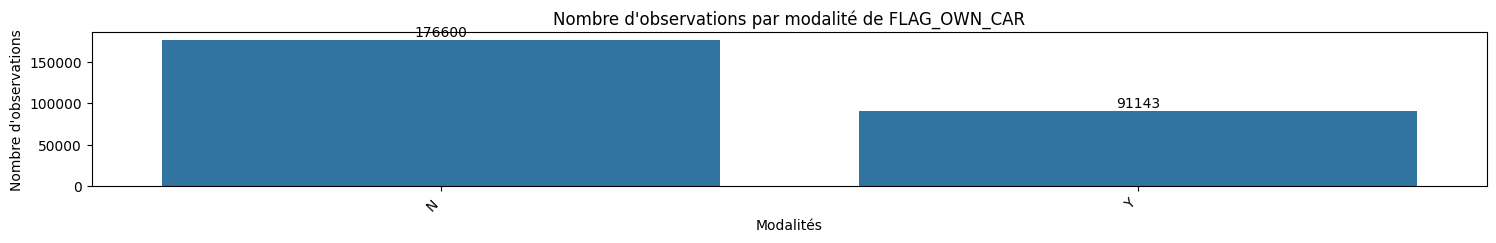

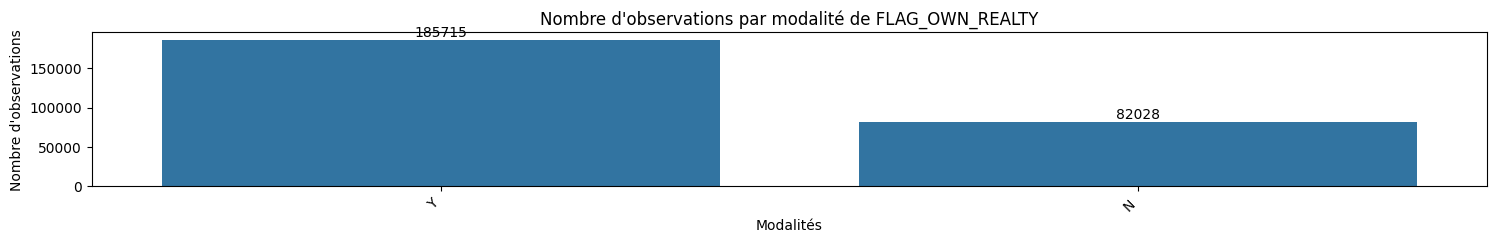

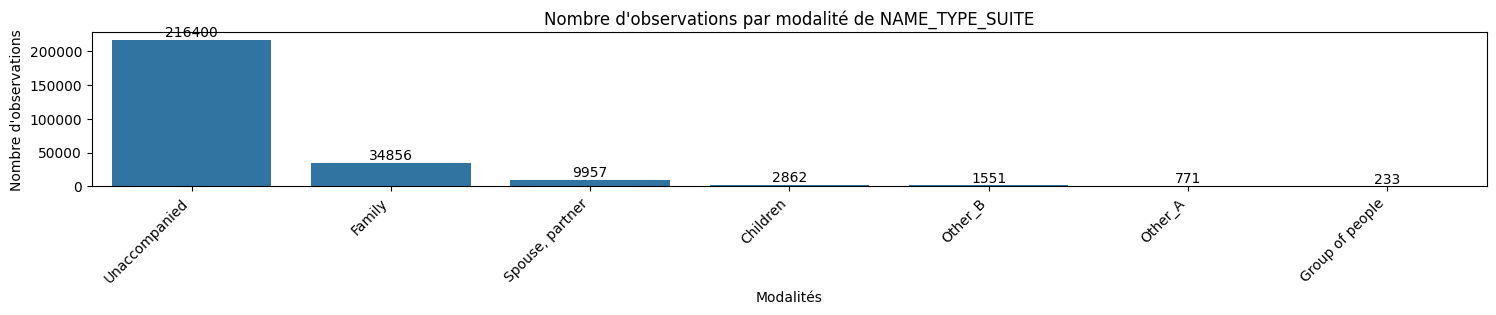

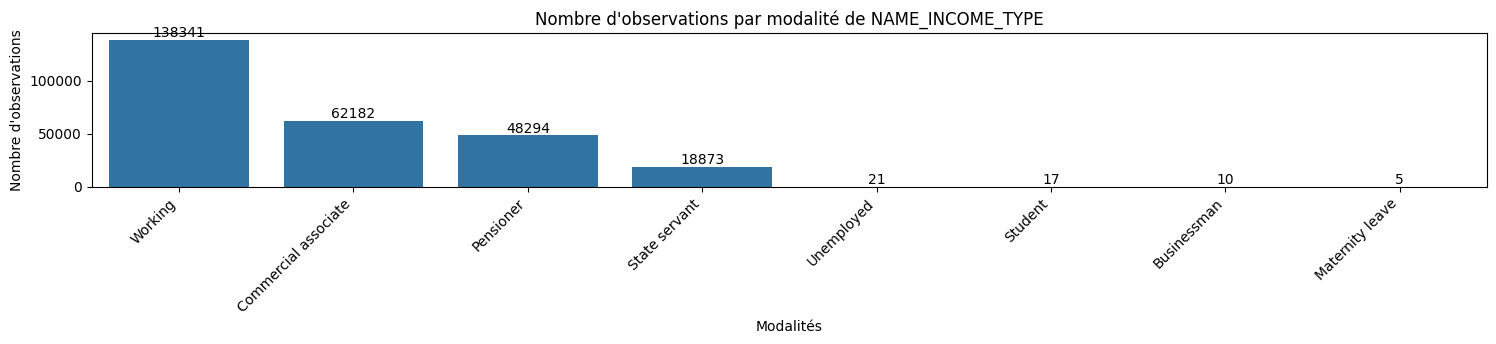

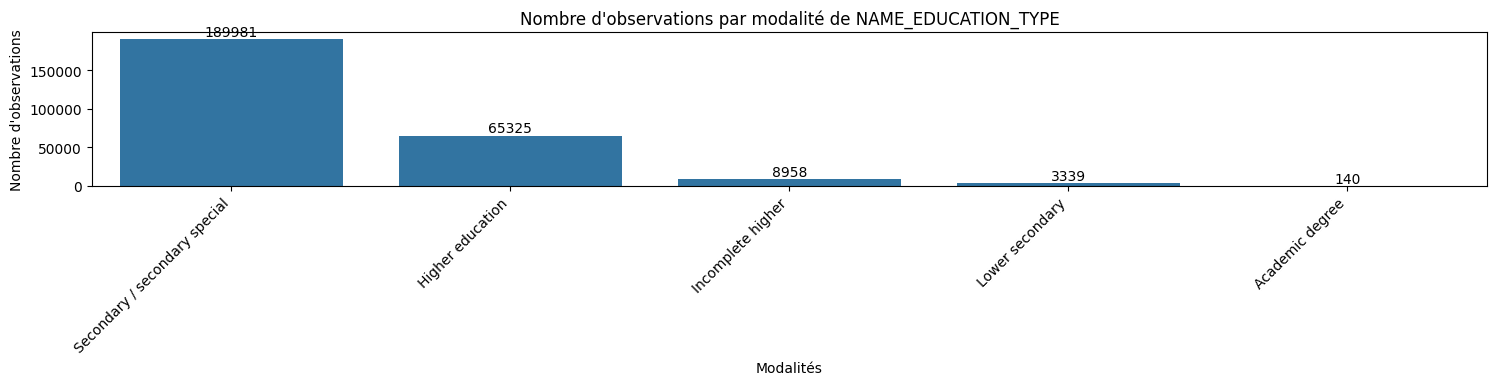

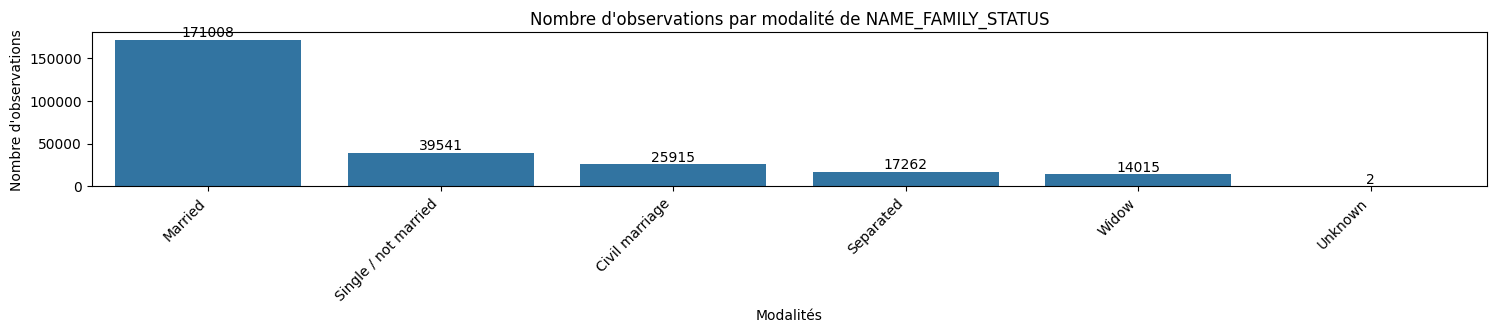

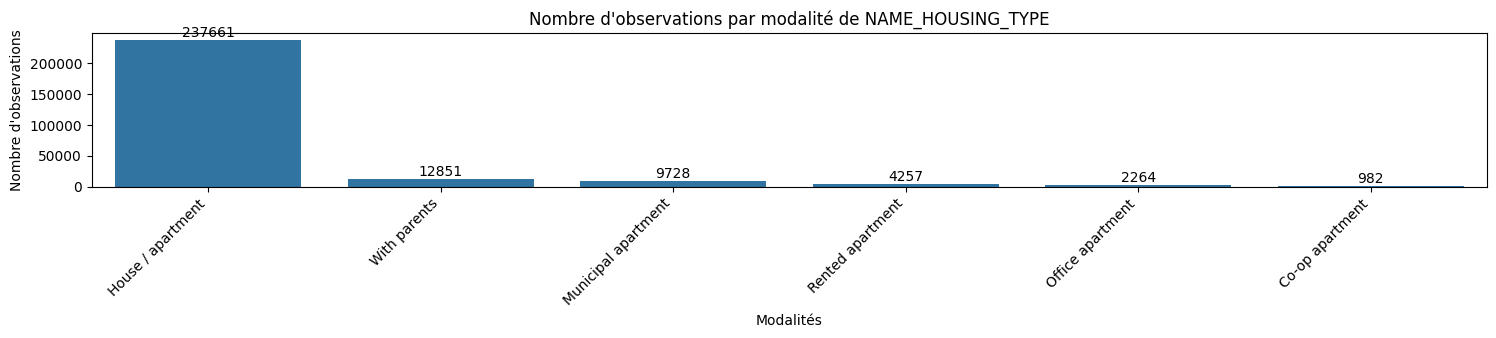

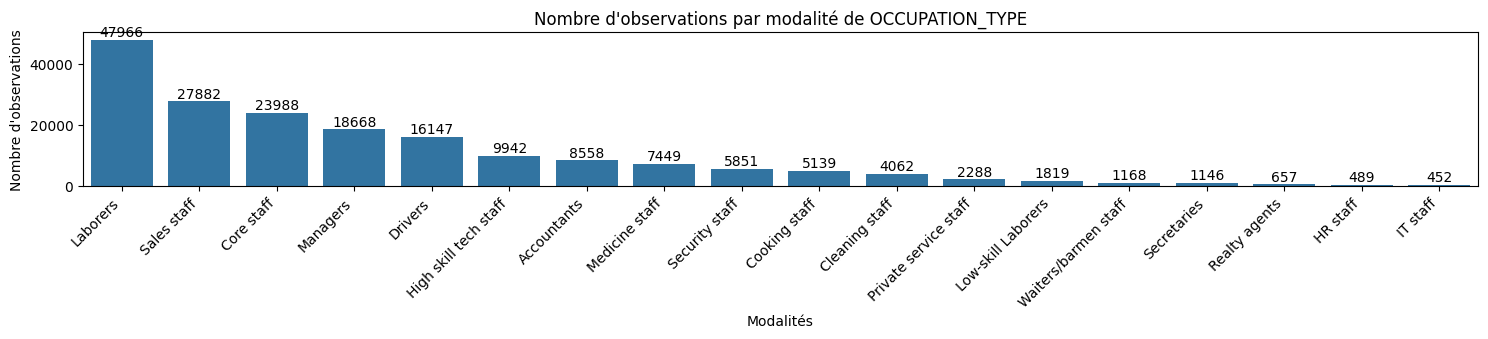

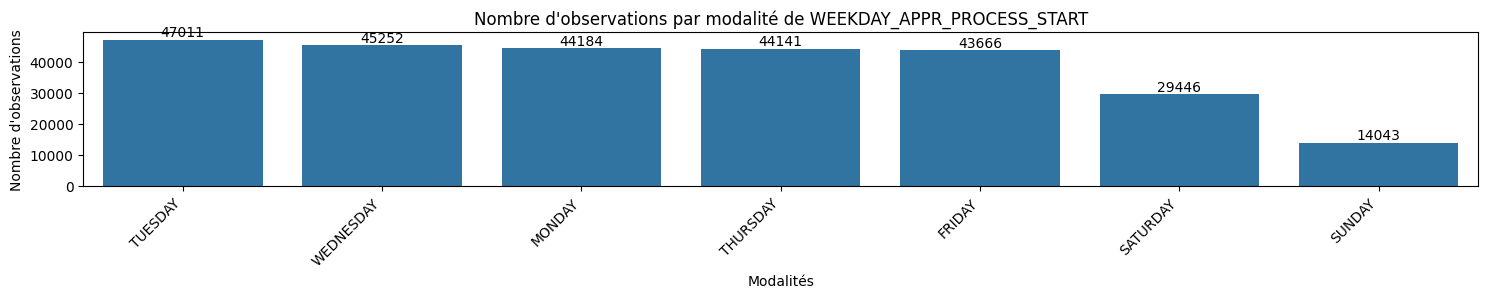

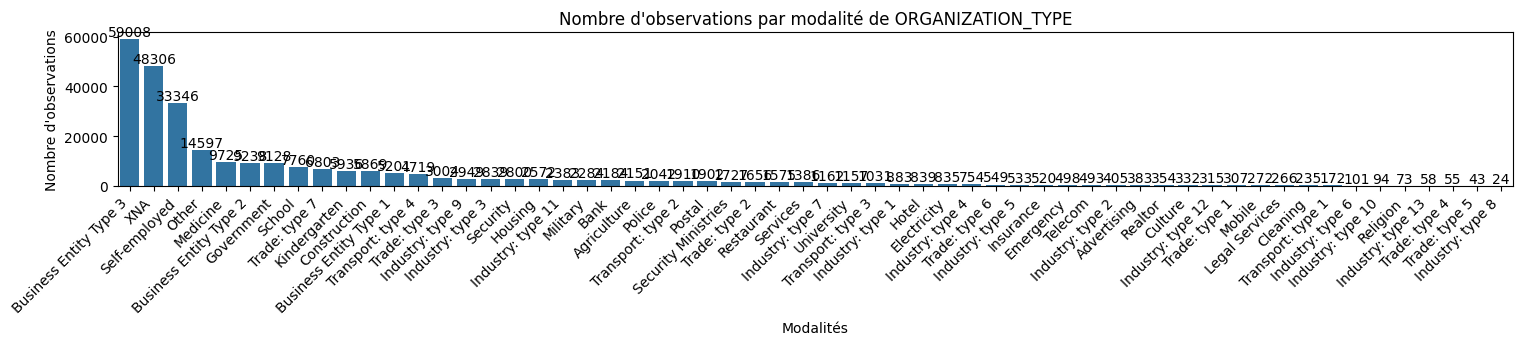

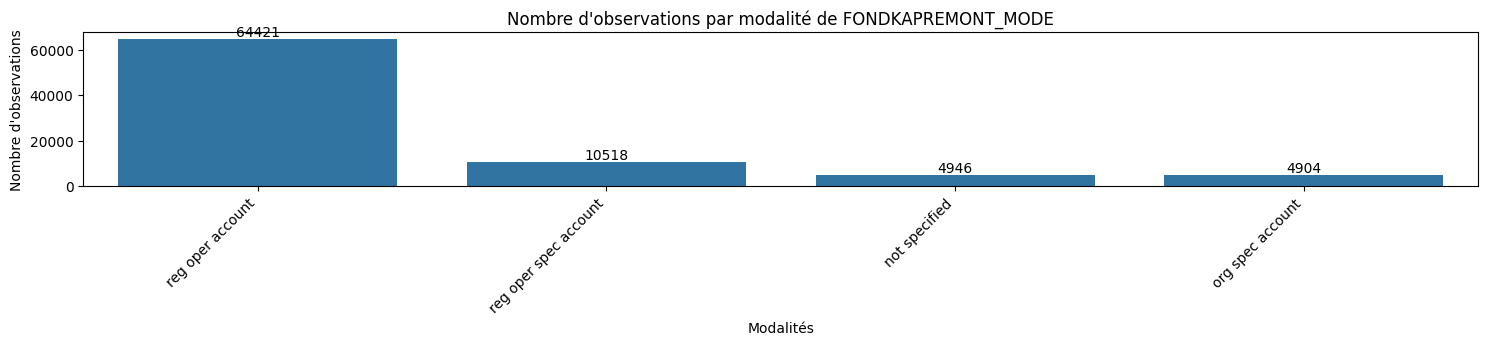

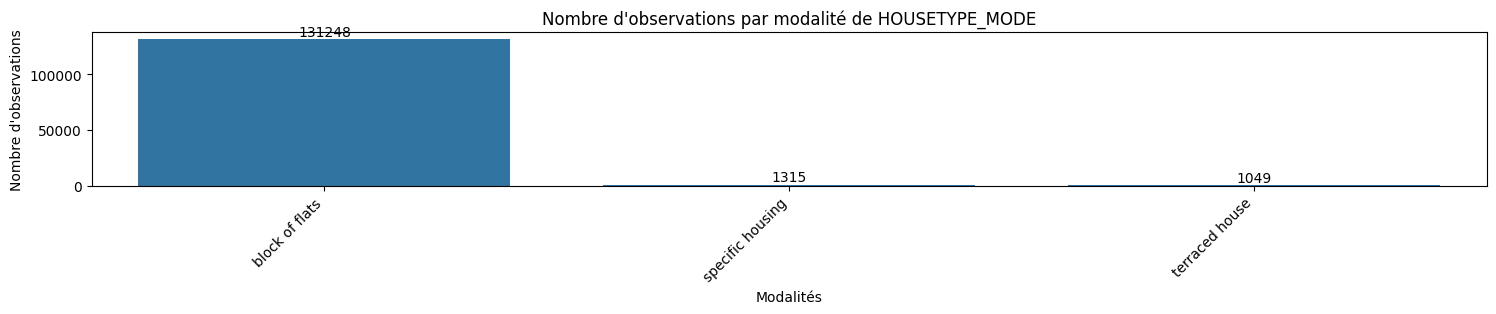

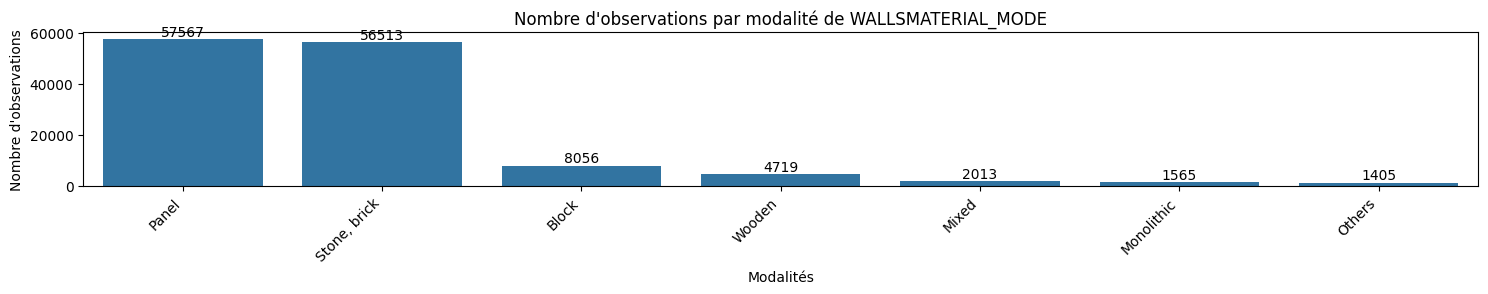

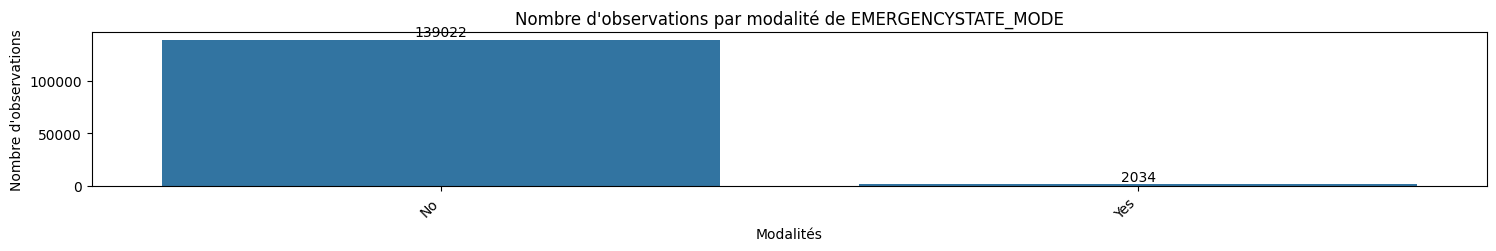

In [59]:
for col in categorical_vars:
    plt.figure(figsize=(18, 2))
    ax = sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    
    # Ajouter le nombre de modalités sur chaque barre (en tant qu'entier)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
    plt.ylabel("Nombre d'observations")
    plt.xlabel('Modalités')
    plt.title(f'Nombre d\'observations par modalité de {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## Variables numériques

In [60]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [83]:
for col in numerical_vars:
    print(f"Nombre de modalités de {col} : {data[col].nunique()}") 
# certaines variables sont mal catégorisées ? encore des modalités = 2?

Nombre de modalités de SK_ID_CURR : 267743
Nombre de modalités de TARGET : 2
Nombre de modalités de CNT_CHILDREN : 15
Nombre de modalités de AMT_INCOME_TOTAL : 2314
Nombre de modalités de AMT_CREDIT : 5391
Nombre de modalités de AMT_ANNUITY : 13360
Nombre de modalités de AMT_GOODS_PRICE : 921
Nombre de modalités de REGION_POPULATION_RELATIVE : 81
Nombre de modalités de DAYS_BIRTH : 17435
Nombre de modalités de DAYS_EMPLOYED : 12261
Nombre de modalités de DAYS_REGISTRATION : 15514
Nombre de modalités de DAYS_ID_PUBLISH : 6144
Nombre de modalités de OWN_CAR_AGE : 62
Nombre de modalités de FLAG_MOBIL : 2
Nombre de modalités de FLAG_EMP_PHONE : 2
Nombre de modalités de FLAG_WORK_PHONE : 2
Nombre de modalités de FLAG_CONT_MOBILE : 2
Nombre de modalités de FLAG_PHONE : 2
Nombre de modalités de FLAG_EMAIL : 2
Nombre de modalités de CNT_FAM_MEMBERS : 17
Nombre de modalités de REGION_RATING_CLIENT : 3
Nombre de modalités de REGION_RATING_CLIENT_W_CITY : 3
Nombre de modalités de HOUR_APPR_PROCES

In [61]:
def is_outlier(df:pd.DataFrame,column:str) -> pd.Series: 

    # 1er Quartile 
    Q1 = df[column].quantile(0.25)

    # 3ème Quartile 
    Q3 = df[column].quantile(0.75)

    # Inter-Quartile Range (IQR)
    IQR = Q3 - Q1

    # limites, basse & haute
    limite_inf = Q1 - 1.5 * IQR
    limite_sup =  Q3 + 1.5 * IQR

    # Remplace les données inférieur et supérieur à la limite par 1 et les autres par 0
    series = df[column].apply(lambda x: 1 if x < limite_inf or x > limite_sup else 0)

    return series

In [79]:
def number_of_outliers_per_variable(df : pd.DataFrame, variables : List[str]) -> pd.DataFrame :
    df_outliers = pd.DataFrame(columns=['variable', 'nbre_outliers', 'pct_outliers'])
    for col in variables :
        outliers_sum = is_outlier(data,col).sum()
        pct_outlier = (outliers_sum/len(df))*100
        df_outliers.loc[len(df_outliers)] = [col, outliers_sum, pct_outlier]
    return df_outliers.sort_values(by="pct_outliers", ascending=False)

In [90]:
df_outliers = number_of_outliers_per_variable(data, numerical_vars)
df_outliers

,variable,nbre_outliers,pct_outliers
20,REGION_RATING_CLIENT,70082,26.175101
21,REGION_RATING_CLIENT_W_CITY,67916,25.366116
9,DAYS_EMPLOYED,62997,23.528906
27,REG_CITY_NOT_WORK_CITY,61513,22.974644
15,FLAG_WORK_PHONE,53188,19.865319
14,FLAG_EMP_PHONE,48317,18.046037
28,LIVE_CITY_NOT_WORK_CITY,47890,17.886555
84,AMT_REQ_CREDIT_BUREAU_QRT,44108,16.474007
83,AMT_REQ_CREDIT_BUREAU_MON,38051,14.211763
76,DEF_30_CNT_SOCIAL_CIRCLE,30565,11.415798


In [93]:
variables_sup_10pct_outliers = df_outliers[df_outliers["pct_outliers"] > 10]
variables_sup_10pct_outliers = variables_sup_10pct_outliers["variable"].tolist()
variables_sup_10pct_outliers

['REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_EMPLOYED',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_WORK_PHONE',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DEF_30_CNT_SOCIAL_CIRCLE']

In [103]:
variables_3_10pct_outliers = df_outliers[(df_outliers["pct_outliers"] > 3)&(df_outliers["pct_outliers"] < 10)]
variables_3_10pct_outliers = variables_3_10pct_outliers["variable"].tolist()
variables_3_10pct_outliers

['DEF_60_CNT_SOCIAL_CIRCLE',
 'REG_CITY_NOT_LIVE_CITY',
 'TARGET',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_MODE',
 'FLAG_EMAIL',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'REG_REGION_NOT_WORK_REGION',
 'NONLIVINGAPARTMENTS_MEDI',
 'AMT_GOODS_PRICE',
 'NONLIVINGAPARTMENTS_MODE',
 'AMT_INCOME_TOTAL',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'LIVE_REGION_NOT_WORK_REGION',
 'TOTALAREA_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE']

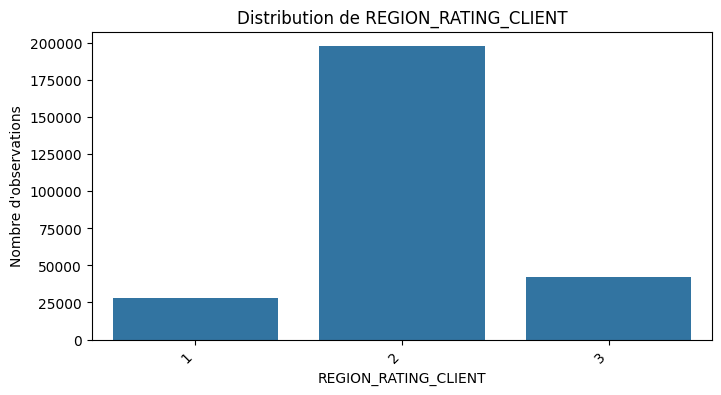

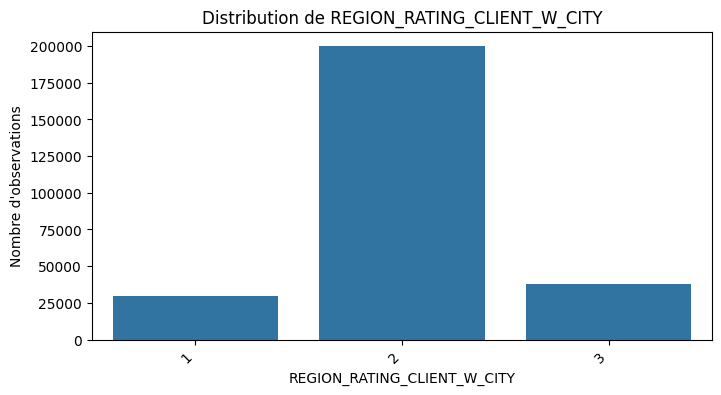

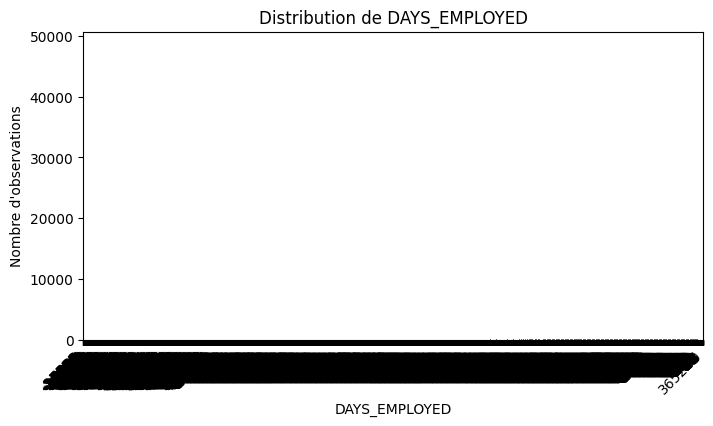

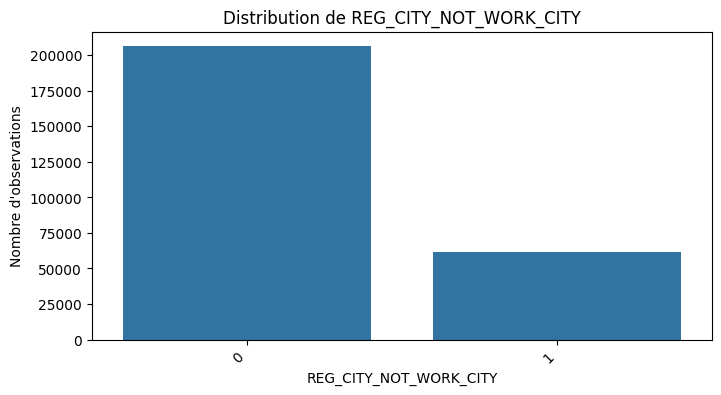

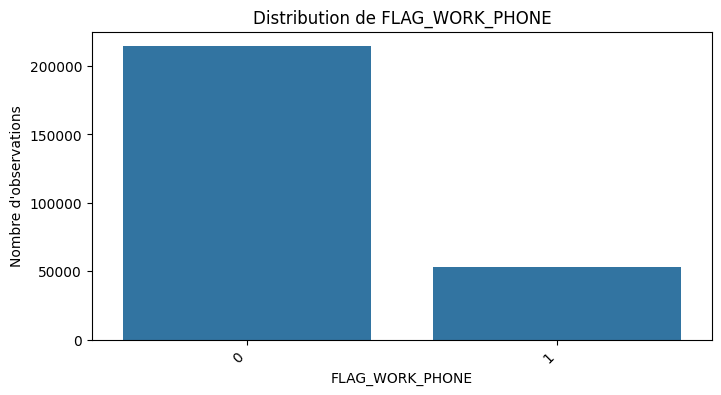

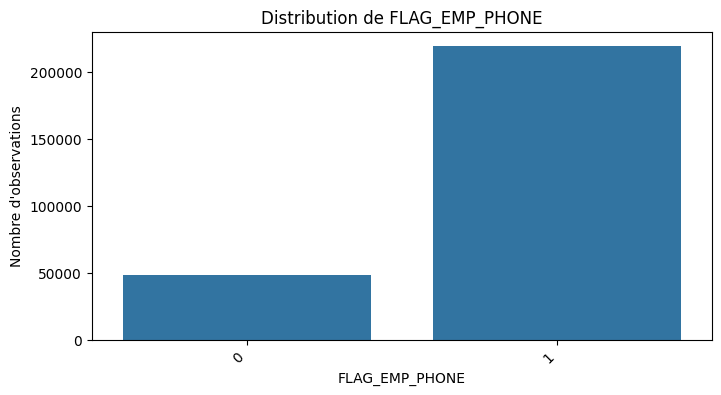

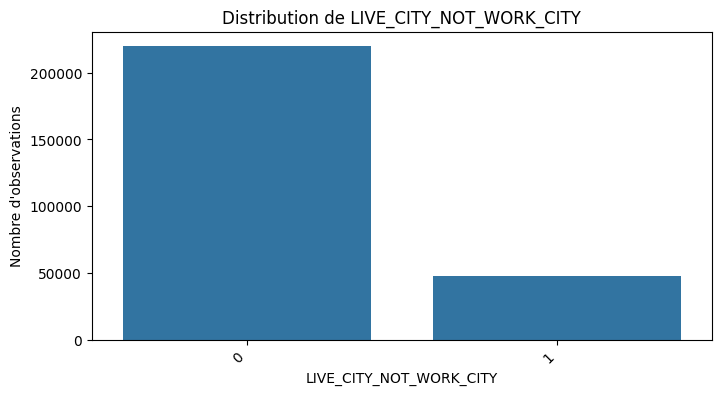

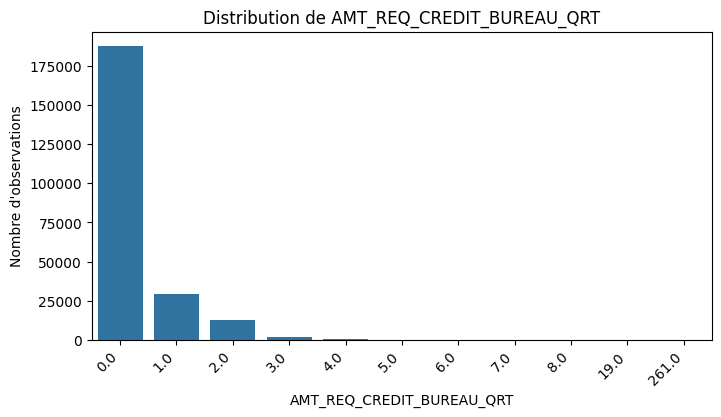

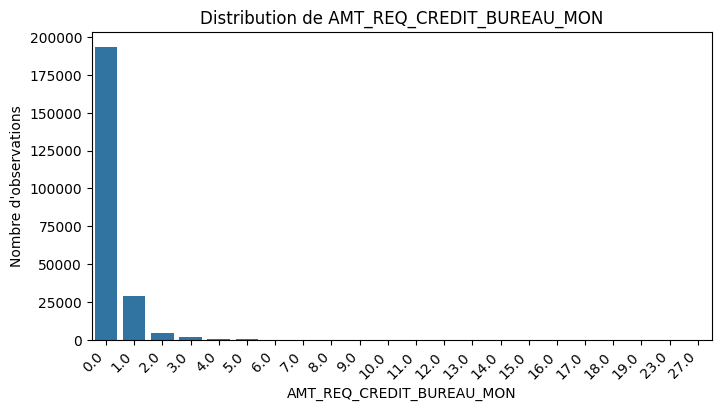

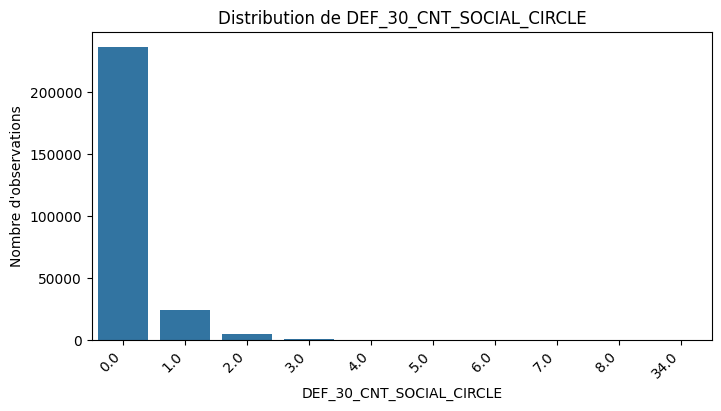

In [104]:
for col in variables_sup_10pct_outliers: # on dirait que ce sont plutôt des variables catégorielles mal catégorisées
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=45, ha='right') 
    plt.show()

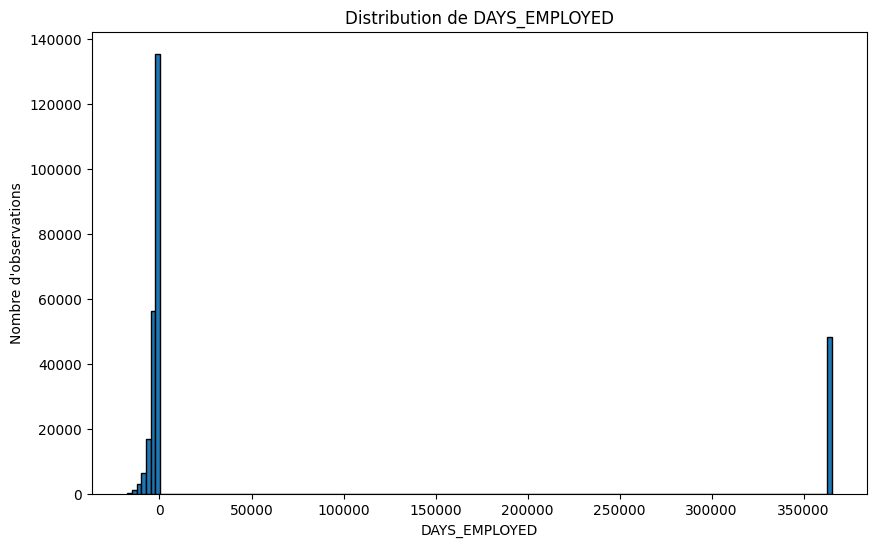

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(data['DAYS_EMPLOYED'], bins=150, edgecolor='black')
plt.title(f'Distribution de {col}')
plt.xlabel(col)
plt.ylabel("Nombre d'observations")
plt.show()

### Variables binaires

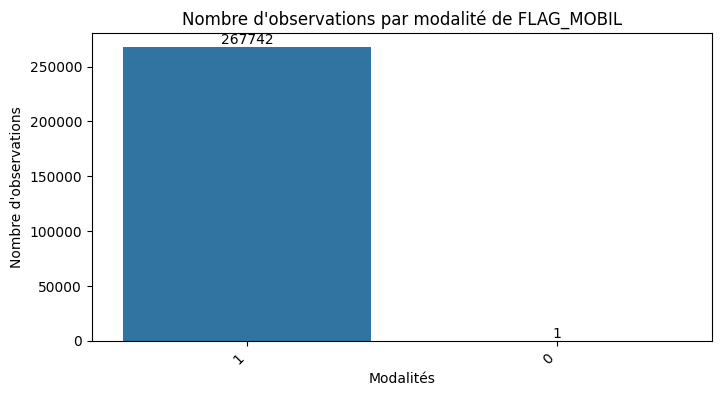

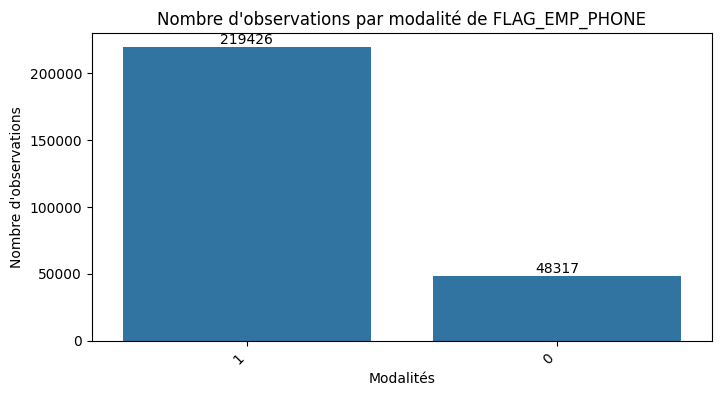

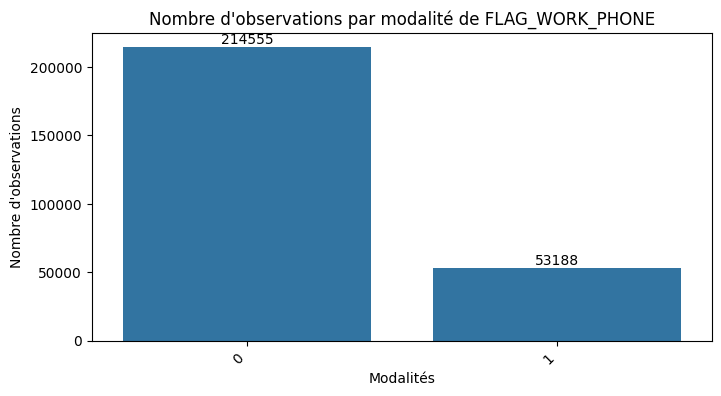

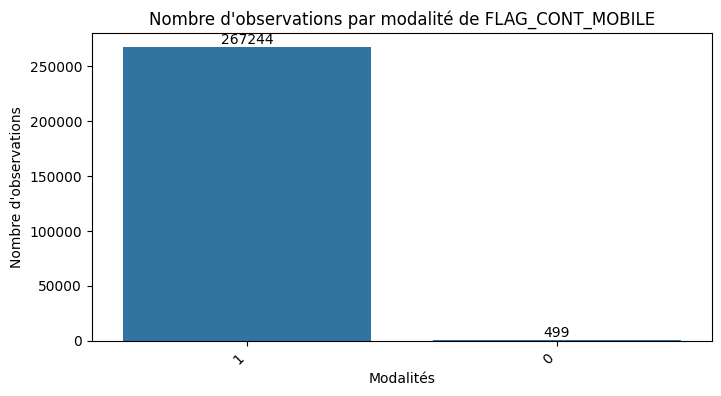

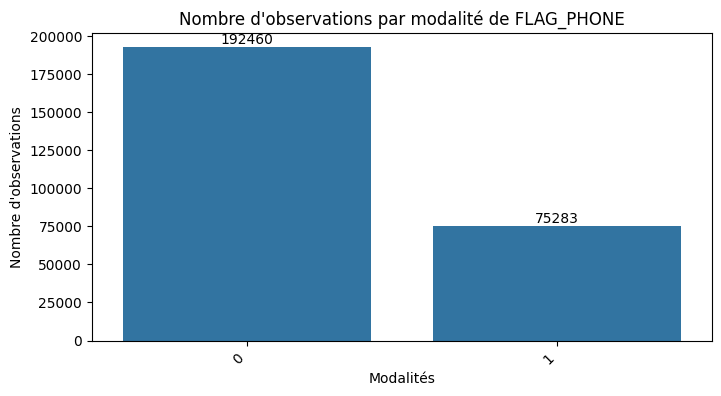

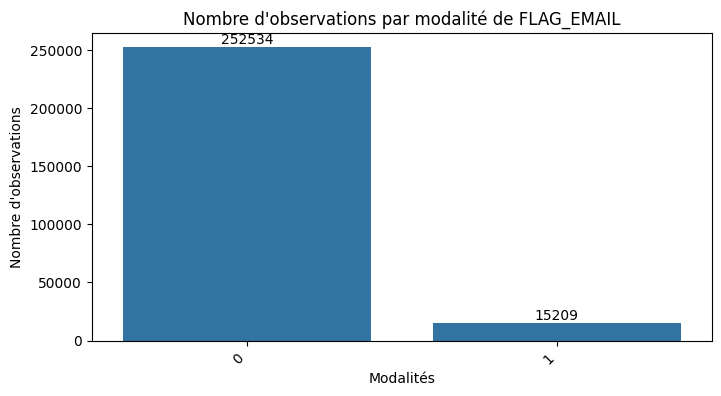

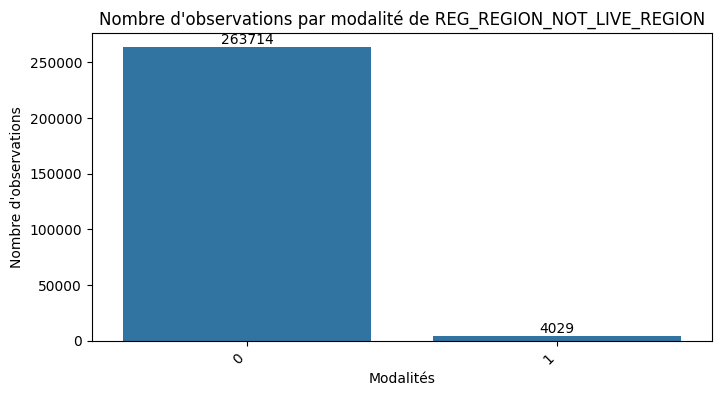

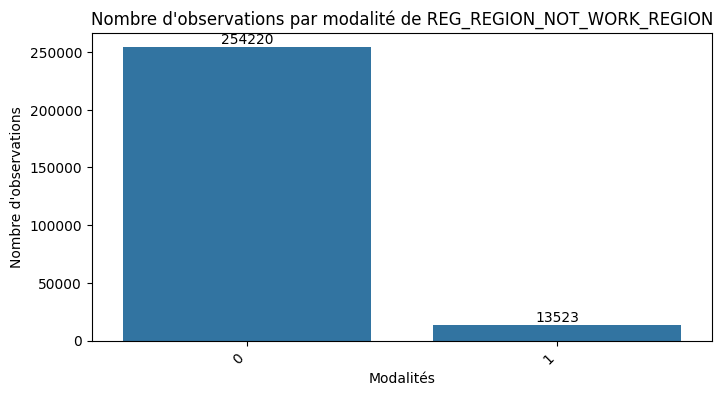

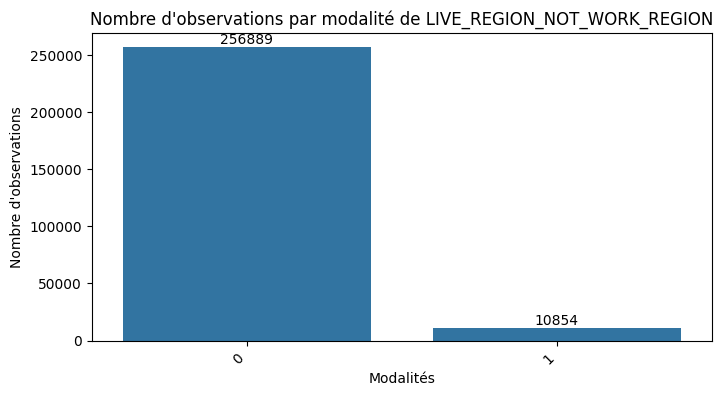

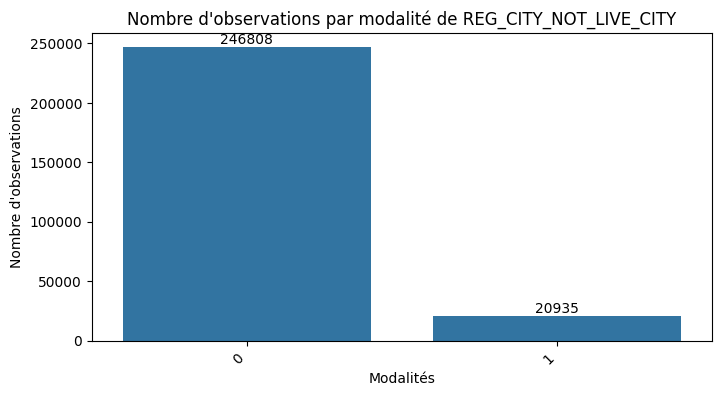

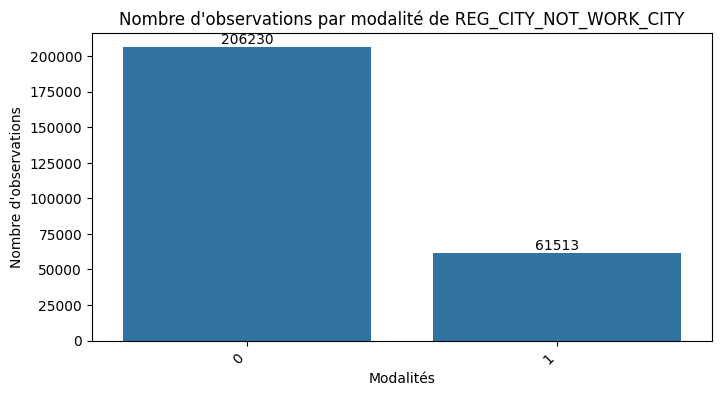

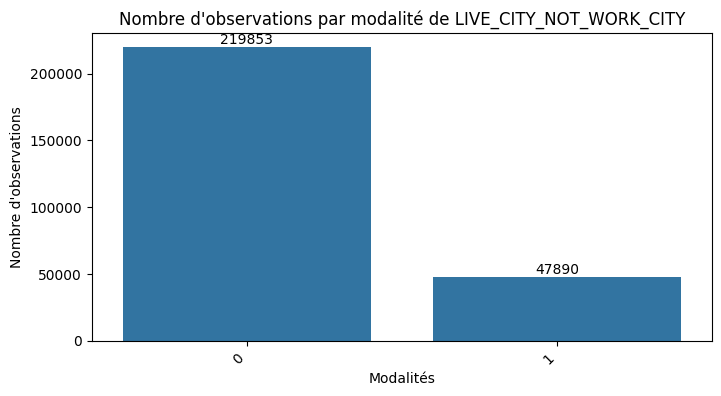

In [86]:
for col in binary_vars:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    
    # Ajouter le nombre de modalités sur chaque barre (en tant qu'entier)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
    plt.ylabel("Nombre d'observations")
    plt.xlabel('Modalités')
    plt.title(f'Nombre d\'observations par modalité de {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()